##  k-Means clustering implementation

In [1]:
import numpy as np 
from matplotlib import pyplot as plt

### Preparation: Generating data to use for testing k-means clustering

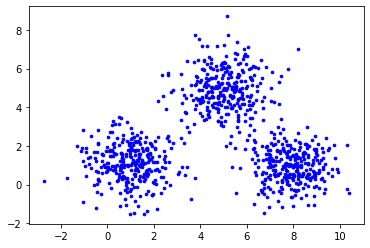

In [2]:
# generate random data 
gt_1 = np.array([1,1])
gt_2 = np.array([5,5])
gt_3 = np.array([8,1])
data_1 = np.random.randn(300,2) + gt_1
data_2 = np.random.randn(300,2) + gt_2
data_3 = np.random.randn(300,2) + gt_3
data = np.concatenate((data_1, data_2, data_3),axis = 0)
plt.scatter(data[:,0], data[:,1], s=7,c='b')

###  Implementaiont of `k_means` function to perform K Means clustering:

In [3]:
def k_means(data, k, centers):
    """
    Perform clustering using K-means algorithm
    :param data: observations
    :param k: number of clusters to cluster into
    :param centers: initial cluster centers
    :return: tuple of:
       1. Final cluster centers
       2. Assignments - np.array with cluster number each observation is assigned to 
       3. WCSS value
    """
    # your code here
    distances = np.zeros((data.shape[0],k),dtype=float)
    centers_new = np.zeros(centers.shape,dtype=float)
    
    iterate = True
    while iterate:
        
        
        for i in range(k):  # matrix of distances between the data points to the centers
            distances[:,i] = (np.sum((data - centers[i])**2, axis=-1))**(1./2)

        classification = np.argmin(distances,axis=-1) # vector that represents class of each data point

        for i in range(k):  # updating the newly formed centers
            centers_new[i] = (np.sum(data[classification==i], axis=0)) / (data[classification==i].shape[0])
            
        if not np.allclose(centers, centers_new): # if the centers changed theire values
            centers = centers_new.copy() # update to current centers
        else:
            iterate = False 
        
    WCSS = (np.min(distances, axis=1)**2).sum()
    return (centers, classification, WCSS)

### Testing k-means function with the generated data

In [4]:
def cluster_and_plot(data, k):
    # pick random centers to be initial cluster centers
    initial_centers = data[np.random.randint(data.shape[0],size=k)]

    # cluster with k-means
    centers, assign, wcss = k_means(data, k, initial_centers)

    print('New cluster centers:\n', centers)

    # plot the data-point and the new clusters
    plt.scatter(data[:,0], data[:,1], s=7, c=assign)
    plt.scatter(centers[:,0], centers[:,1], marker='^', c='r', s=80, label='Cluster centers');
    plt.legend()
    plt.title(f'Points clustered with k-means, k: {k}, colored by cluster, WCSS: {round(wcss, 2)}');

#### Questions:
- **2a.** Using `cluster_and_plot` function above and your `k-means` function, cluster into 3 clusters and plot the `data` that was generated earlier
- **2b.** Would you say that clustering is good?
- **2c.** Now cluster into 4 clusters
- **2d.** Compare the WCSS of clustering into 3 & 4 clusters.  What's your conclusion?
- **2e.** Plot different k values and their WCSS values.  How many clusters would you classify into and why?

### Using cluster_and_plot function k-means function, cluster into 3 clusters and plot

New cluster centers:
 [[0.9769294  1.10288151]
 [5.01960255 4.94037192]
 [7.88799864 0.9449247 ]]


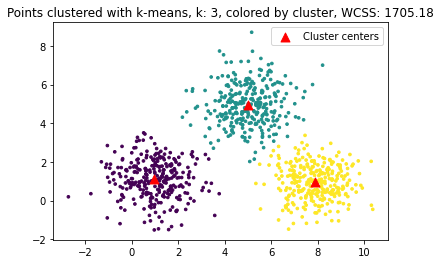

In [5]:
cluster_and_plot(data, 3)

### clustering into 4 clusters

New cluster centers:
 [[1.26262772 1.8122812 ]
 [5.05412481 4.96550583]
 [0.70112002 0.32352238]
 [7.88799864 0.9449247 ]]


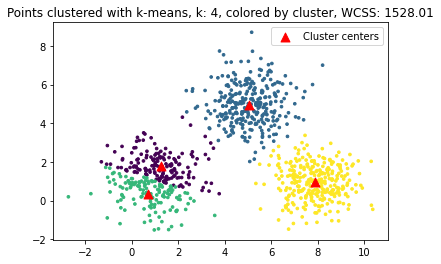

In [6]:
cluster_and_plot(data, 4)

### Comparison of the WCSS of clustering into 3 & 4 clusters:

the wcss will decrease when increaing the value of k, because the more centers you will have, the shorter the distances to the centers will be. the extreme case is when k equals the number of data point, then the wcss will be zero because the distance from each data point to it's center will be zero. 

### Plotting different k values and their WCSS values:

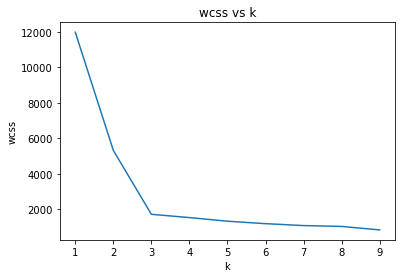

In [7]:
ks = np.arange(1,10)
wcss_arr = []
for k in ks:
    initial_centers = data[np.random.randint(data.shape[0],size=k)]
    centers, assign, wcss = k_means(data, k, initial_centers)
    wcss_arr.append(wcss)
plt.plot(ks,wcss_arr)
plt.xlabel('k')
plt.ylabel('wcss')
plt.title('wcss vs k')
plt.show()

the wcss represents the variation of distances from the centers within each cluster, the change of variation after k = 3 is not steep as the change in smaller values, therfore from this graph the elbow is at k = 3 and that is the best value for k.

###  Using k-means function for image quantization

WCSS channel 0: 25603274
WCSS channel 1: 24342883
WCSS channel 2: 17646994


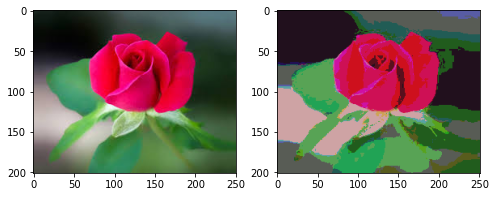

In [8]:
from PIL import Image
import scipy.misc

def apply_clustering(im):
    [width, height, color] = im.shape
    out = np.zeros_like(im)
    k = 3
    # apply clustering on each color channel
    for col_channel in range(color):
        # prepare 
        channel_vals = im[:,:,col_channel].ravel()
        data = np.expand_dims(channel_vals,1)

        #prepare random centers and call K_means method
        centers = data[np.random.randint(data.shape[0], size=k)]
        centers, assign, wcss = k_means(data, k, centers)
        print(f'WCSS channel {col_channel}: {int(wcss)}')
        
        #transform the colors in the image accirding to the clustering
        for i in range(k):
            channel_vals[assign == i] = centers[i]
        gray = np.reshape(channel_vals, [width, height])
        out[:,:,col_channel] = gray
    return out

# read image and apply clustering 
im1 = np.array(Image.open("flower.jpg"))
out1 = apply_clustering(im1)

# show input vs output
plt.figure(1,figsize=(8,16))
plt.subplot(1,2,1);
plt.imshow(im1);
plt.subplot(1,2,2);
plt.imshow(np.float32(out1)/255);